In [1]:
import sys
sys.path.append('../python/')
import NGC5533_functions as nf
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline

In [4]:
#Next: Spline bulge, make that a function, give prefactor
# - call file, get vector

# library code
'''def b_gammafunc(x,n=n_c):
    return ss.gammainc(2*n,x)*ss.gamma(2*n)-0.5*ss.gamma(2*n)
b_root = so.brentq(b_gammafunc,0,500000,rtol=0.000001,maxiter=100) #come within 1% of exact root within 100 iterations

def b_I0(n=n_c):
    return L*(b_root**(2*n))/(re**2*2*np.pi*n*ss.gamma(2*n))
def b_r0(n=n_c):
    return re/np.power(b_root,n)

def b_innerintegral(m,n=n_c):
    f = lambda x,m,n: np.exp(-np.power(x/b_r0(n), (1/n)))*np.power(x/b_r0(n), 1/n-1)/(np.sqrt(x**2-m**2)) #Inner function
    return si.quad(f, m, np.inf,args=(m,n))[0]
b_innerintegralv = np.vectorize(b_innerintegral)

def b_vsquare(r,n=n_c):
    C = lambda n: (4*G*q*ups*b_I0(n))/(b_r0(n)*np.float(n))*(np.sqrt((np.sin(i)**2)+(1/(q**2))*(np.cos(i)**2)))
    h = lambda m,r,n: C(n)*b_innerintegral(m,n)*(m**2)/(np.sqrt((r**2)-((m**2)*(e2)))) #integrate outer function
    return si.quad(h, 0, r, args=(r,n))[0]
def b_vsquarev(r,n=n_c):
    a = np.vectorize(b_vsquare, otypes=[np.float])
    return a(r,n)

def b_v(r,n=n_c,save=False,load=False,**kwargs):
    if save:
        a = b_vsquarev(r,n)**(1/2)
        savedata(r,a,'bulge','n'+str(n),**kwargs)
        return a
    elif load:
        return loaddata('bulge','n'+str(n),**kwargs)
    else:
        a = b_vsquarev(r,n)**(1/2)
        return a(r,n)
'''


#vb_v = np.vectorize(nf.b_v)

# - spline fit vector
#r = np.linspace(0,100,100)
#vb_v_spline = InterpolatedUnivariateSpline(r, nf.b_v, k=3)

r = np.linspace(0.1,20,10)
b = 1
print(nf.b_vsquarev([1,2],2.5)**(1/2))
vbspline = InterpolatedUnivariateSpline(r, b*nf.b_v(r), k=3)    #turns array vb into an approximate function
print(vbspline.get_coeffs())

#vb_v_spline = inter.splprep(nf.b_v, k=3)
# - calculate over spline
# - prefactor in sum

[269.76579778 267.73450597]
[138.18149392 289.80547432 216.69795275 194.67756998 174.31857716
 160.02433465 147.86643584 134.64782529 127.0457457  122.61463601]


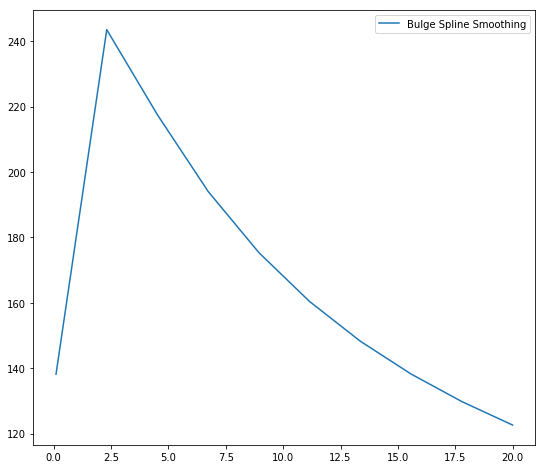

In [5]:

fig = plt.figure(figsize=(9.0,8.0))

plt.plot(r,vbspline(r),label='Bulge Spline Smoothing')
#plt.plot(r,v(r,b),label='Bulge Spline Smoothing')

plt.legend()
plt.show()